# Прогнозирование популярного продукта для интернет-магазина по продаже компьютерных игр 

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
___
**Цель исследования:** Выявить определяющие успешность игры закономерности для того, чтобы сделать ставку на потенциально популярный продукт и спланировать будущие рекламные кампании. Определить портреты пользователей в каждом регионе.
 
**Контекст исследования:**  Исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation) до 2016 года. В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Основные вопросы исследования**: 
- Отработка принципа работы с данными для прогнозирования продаж (вне зависимости от года)
- Важны ли данные за все периоды?
- За какой характерный срок появляются новые и исчезают старые платформы?
- Какие платформы лидируют по продажам, растут или падают?
- Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
- Одинаковы ли средние пользовательские рейтинги платформ Xbox One и PC?
- Разные ли средние пользовательские рейтинги жанров Action и Sports?
 
**План исследования**:
- Изучить общую информацию о данных
- Предобработать данные
- Провести исследовательский анализ данных
- Составить портрет пользователя каждого региона
- Проверить объявленные гипотезы
- Сделать общие выводы по исследованию

**Описание данных:**

*Датасэт - `/datasets/games.csv`*

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


___

## Загрузка данных

### Импортируем необходимые библиотеки и устанавливаем общие параметры для отображения датафреймов

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats as st

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

###  Загружаем и изучаем общую информацию о данных

In [2]:
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
# Выводим первые 10 строчек данных
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# Получаем общую информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# Посмотрим на уникальные значения оценок пользователей
data['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [6]:
# Узнаем, сколько наименований игр представлено в датасете
len(data['Name'].unique())

11560

In [7]:
# Узнаем, какие платформы представлены в данных и сколько их
display(data['Platform'].unique())
print('Всего платформ:', len(data['Platform'].unique()))

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Всего платформ: 31


In [8]:
# Узнаем, какие жанры игр представлены в данных и сколько их
display(data['Genre'].unique())
print('Всего жанров игр:', len(data['Genre'].unique()))

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Всего жанров игр: 13


---
**Выводы по полученной информации:** 

- Всего есть данные о *~11 560* выпущенных играх
- В данных представлена информация об играх, выпущенных на *31 платформе*
- Всего представлено *13 игровых жанров* 
- Необходимо привести название столбцов к единому виду
- В данных есть пропущенные значения, которые следует обработать
- В столбце `User_Score` есть оценка *tbd*, что означает *to be determined ("будет определено")*. В целом, это равносильно отсутствующему значению -> нужно заменить на NaN
- Стоит заменить тип данных столбца `Year_of_Release` на **`int`**, а столбца `User_Score` -> на **`float`**


---

## Предобработка данных

### Изменение названий столбцов

In [9]:
# Приводим столбцы к нижнему регистру
data.columns = map(str.lower, data.columns)

In [10]:
# Проверка
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


###  Находим и обрабатываем пропущенные значения 

In [11]:
# Еще раз посмотрим на столбцы, в которых есть пропущенные значения
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Обработка пропусков в столбцах `[name]` и `[genre]`

In [12]:
# Выведем строки с пропусками в столбцах [name] и [genre]
data.query('name.isna() & genre.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


- Данные в этих строках вряд ли подлежат восстановлению
- Вероятно, данные пропущены по технической ошибке (либо данные исторически утеряны)
- Строки с пропусками в столбцах `name` и `genre` - одинаковые
- Продажи по копиям тоже не впечатляют, значит, удаление строк не критически отразится на общих данных и закономерностях
- Вдобавок, эти строки занимают **~0.01%** от общих данных. Думаю, имеем полное право их убрать

In [13]:
# Убираем строки с пропусками в столбцах [name] и [genre]
data = data.dropna(subset=['name']).reset_index(drop=True)

# Проверка
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Обработка пропусков в столбце `[year_of_release]`

In [14]:
# Выведем и посчитаем строки с пропусками в столбце [year_of_release]
print('Количество пропущенных значений по году выпуска: ', data['year_of_release'].isna().sum())
print('Доля пропущенных значений от общего числа записей: ',
      '{:.2%}'.format(data['year_of_release'].isna().sum() / data.shape[0]))
data.query('year_of_release.isna()')

Количество пропущенных значений по году выпуска:  269
Доля пропущенных значений от общего числа записей:  1.61%


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
718,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
804,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


- Вероятно, пропуски возникли по причине технической ошибки. Однако мог и сыграть человеческий фактор при переносе большого объема данных из внешней базы. 
- Известен факт из индустрии, что у большинства спортивных игр в названии написан **следующий год после настоящего года выпуска** (несколько строк было проверено вручную - такая закономерность в мире компьютерных игр действительно существует).
- К примеру, "Madden NFL 2004" в названии имеет 2004 год. Однако игра была выпущена в *2003*. 	
- Предлагаю для жанров *Sports* и *Fighting* написать функцию, которая будет вписывать в столбец `year_of_release` такое значение, которое будет на единицу меньше числа из названия игры 
- Остальные данные с пропущенным годом выпуска - **удалим**, так как по выведенной выше таблице видно, что, помимо отсутствующего года, в данных часто отсутствует и информация об оценках (+ кол-во проданных копий -> минимально)

In [15]:
# Укажем списком года, которые мы будем искать в названии игр
years = ['01', '02', '03', '04', '05', '06', '07', '08', '09' '2000', '2001', '2002', '2003', '2004', '2005',
         '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']


# Пишем функцию
def fill_missing_years(data, years):
    """
    Функция заменяет пропущенные значения 'NaN' в столбце 'year_of_release' у игр с жанрами 'Sports' и 'Fighting' на один год 
    раньше того, который указан в названии игры.
    ----------
    PARAMETERS
    ----------
    data: Pandas Dataframe
        Набор данных.
    years: List
        Список искомых чисел (годов) в названии игры
    --------
    RETURNS
    --------
    data: Pandas Dataframe
        Обновленный датафрейм с замененными пропущенными значениями
    """

    for idx, row in data[
        (data['year_of_release'].isnull()) & ((data['genre'] == 'Sports') | (data['genre'] == 'Fighting'))].iterrows():
        game_name = row['name']
        for year in years:
            if year in game_name:
                if len(year) == 2:
                    year_value = '20' + year
                else:
                    year_value = year

                data.at[idx, 'year_of_release'] = int(year_value) - 1
                break
    return data

In [16]:
# Применяем функцию
data = fill_missing_years(data, years)

In [17]:
# Проверим работу функции на нескольких примерах
data.query('name in ["FIFA Soccer 2004", "All-Star Baseball 2005", "Madden NFL 07"]')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
241,Madden NFL 07,PS2,2006.0,Sports,3.63,0.24,0.01,0.61,84.0,8.2,E
377,FIFA Soccer 2004,PS2,2003.0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
971,Madden NFL 07,X360,2006.0,Sports,1.66,0.00,0.01,0.13,80.0,6,E
2034,Madden NFL 07,XB,2006.0,Sports,0.97,0.03,0.00,0.03,83.0,8.7,E
2478,Madden NFL 07,PSP,2006.0,Sports,0.77,0.03,0.00,0.04,78.0,6.6,E
2605,FIFA Soccer 2004,XB,2003.0,Sports,0.24,0.49,0.00,0.05,82.0,8.2,E
3228,Madden NFL 07,GC,2006.0,Sports,0.48,0.13,0.00,0.02,82.0,9.2,E
3837,Madden NFL 07,PS3,2006.0,Sports,0.47,0.00,0.01,0.04,76.0,4.2,E
4005,Madden NFL 07,Wii,2006.0,Sports,0.46,0.00,0.00,0.04,81.0,8,E
5654,All-Star Baseball 2005,PS2,2004.0,Sports,0.16,0.12,0.00,0.04,72.0,8.6,E


In [18]:
# Уберем оставшиеся пропуски
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)

# Проверка
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16461 entries, 0 to 16460
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16461 non-null  object 
 1   platform         16461 non-null  object 
 2   year_of_release  16461 non-null  float64
 3   genre            16461 non-null  object 
 4   na_sales         16461 non-null  float64
 5   eu_sales         16461 non-null  float64
 6   jp_sales         16461 non-null  float64
 7   other_sales      16461 non-null  float64
 8   critic_score     7996 non-null   float64
 9   user_score       9852 non-null   object 
 10  rating           9781 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Обработка пропусков в столбце `[сritic_score]`

In [19]:
# Выведем и посчитаем строки с пропусками в столбце [сritic_score]
print('Количество пропущенных значений в оценках критиков: ', data['critic_score'].isna().sum())
print('Доля пропущенных значений от общего числа записей: ',
      '{:.2%}'.format(data['critic_score'].isna().sum() / data.shape[0]))

Количество пропущенных значений в оценках критиков:  8465
Доля пропущенных значений от общего числа записей:  51.42%


- Судя по датасету, мы имеем более 51% неоцененных игр со стороны критиков. 
- В целом, игры могли просто не оцениваться критиками (так как не было подобной тенденции, или же игра не вызывала ажиотажа среди критиков). Нельзя не оставить шанс и на техническую ошибку. 
- Удалять более половины датасета -> нецелесообразно, а заменять "индивидуальные" оценки каким-то средним значением мне тоже кажется нерациональным решением.
- **Оставляем** пропуски

#### Обработка пропусков в столбце `[user_score]`

Как уже говорилось выше, столбце `User_Score` есть оценка *tbd*, что означает *to be determined ("будет определено")*. В целом, это равносильно отсутствующему значению -> нужно **заменить на NaN**

In [20]:
# Для начала заменим найденные значения TBD на NaN: удобно через приведение к вещественному типу с указанием исключения
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

# Проверка
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16461 entries, 0 to 16460
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16461 non-null  object 
 1   platform         16461 non-null  object 
 2   year_of_release  16461 non-null  float64
 3   genre            16461 non-null  object 
 4   na_sales         16461 non-null  float64
 5   eu_sales         16461 non-null  float64
 6   jp_sales         16461 non-null  float64
 7   other_sales      16461 non-null  float64
 8   critic_score     7996 non-null   float64
 9   user_score       7474 non-null   float64
 10  rating           9781 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [21]:
# Выведем и посчитаем строки с пропусками в столбце [user_score]
print('Количество пропущенных значений в оценках пользователей: ', data['user_score'].isna().sum())
print('Доля пропущенных значений от общего числа записей: ',
      '{:.2%}'.format(data['user_score'].isna().sum() / data.shape[0]))

Количество пропущенных значений в оценках пользователей:  8987
Доля пропущенных значений от общего числа записей:  54.60%


- Ситуация схожа с оценками критиков -> более половины представленных игр не имеют оценок пользователей. Для каких-то игр, вероятно, не прошло достаточно времени, чтобы их оценили (на момент публикации данных), для других же оценок просто нет. 
- Причина может быть и в том, что собрать *среднюю пользовательскую оценку* по некоторым играм тяжело из-за забитости интернет-пространства разными оценками. Оставляем шанс на техническую ошибку во время сбора данных в общую базу. 
- Замена средним значением по жанру / году выпуска / платформе - *невозможна*, поскольку оценка всегда индивидуальна. Подобная махинация может искажать ход исследования
- В любом случае, удалять такое количество данных - **нельзя**, это явно негативно скажется на общей статистике. 
- **Оставляем пропуски**

#### Обработка пропусков в столбце `[rating]`

In [22]:
# Посмотрим, какие в принципе есть рейтинговые оценки от ассоциации ESRB
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [23]:
# Посчитаем и выведем кол-во пропущенных значений
print('Количество пропущенных значений рейтинга: ', data['rating'].isna().sum())
print('Доля пропущенных значений от общего числа записей: ',
      '{:.2%}'.format(data['rating'].isna().sum() / data.shape[0]))

Количество пропущенных значений рейтинга:  6680
Доля пропущенных значений от общего числа записей:  40.58%


- Доля пропущенных значений - достаточна велика. Не думаю, что присутствует системность в пропусках, как и вряд ли есть весомая причина их наличия. Предполагаю, что пропуски присутствуют либо из-за ситуаций, когда для игры не был определен возрастной рейтинг, либо из-за потерь этих данных при переносе из большой исторической базы. 
- Удалять пропуски **не имеет смысла**, поэтому предлагаю заменить пропущенные значения словом "Unknown" *(неизвестный)*

In [24]:
# Заменяем пропущенные значения
data['rating'] = data['rating'].fillna('Unknown')

# Проверка
print('Кол-во оставшихся пропущенных значений: ', data['rating'].isna().sum())
data.head()

Кол-во оставшихся пропущенных значений:  0


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown


In [25]:
# Общая проверка после убранных пропущенных значений
display(data.shape)
data.info()

(16461, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16461 entries, 0 to 16460
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16461 non-null  object 
 1   platform         16461 non-null  object 
 2   year_of_release  16461 non-null  float64
 3   genre            16461 non-null  object 
 4   na_sales         16461 non-null  float64
 5   eu_sales         16461 non-null  float64
 6   jp_sales         16461 non-null  float64
 7   other_sales      16461 non-null  float64
 8   critic_score     7996 non-null   float64
 9   user_score       7474 non-null   float64
 10  rating           16461 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


### Поиск и обработка дубликатов

In [26]:
# Поиск дубликатов
data.duplicated().sum()

0

- Явные дубликаты не обнаружены
- Неявных дубликатов тоже нет, так как одна игра выходит на нескольких платформах. Если бы неявные дубликаты были - у них были бы одинаковые продажи / платформы. Думаю, не имеет и смысла это проверять

### Преобразование типов данных

In [27]:
# Еще раз выведем информацию о данных и обратим внимание на `Dtype`
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16461 entries, 0 to 16460
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16461 non-null  object 
 1   platform         16461 non-null  object 
 2   year_of_release  16461 non-null  float64
 3   genre            16461 non-null  object 
 4   na_sales         16461 non-null  float64
 5   eu_sales         16461 non-null  float64
 6   jp_sales         16461 non-null  float64
 7   other_sales      16461 non-null  float64
 8   critic_score     7996 non-null   float64
 9   user_score       7474 non-null   float64
 10  rating           16461 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


- В столбце `year_of_release` заменяем тип данных на **`Int64`**, так как год - целое число
- В столбце `critic_score` заменяем тип данных на **`Int64`** (обходя значения `NaN`), так как все оценки - целые числа (получили эту информацию в общем анализе данных) 

In [28]:
# Преобразуем типы данных
data['year_of_release'] = data['year_of_release'].astype('int')

# Проверка
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16461 entries, 0 to 16460
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16461 non-null  object 
 1   platform         16461 non-null  object 
 2   year_of_release  16461 non-null  int64  
 3   genre            16461 non-null  object 
 4   na_sales         16461 non-null  float64
 5   eu_sales         16461 non-null  float64
 6   jp_sales         16461 non-null  float64
 7   other_sales      16461 non-null  float64
 8   critic_score     7996 non-null   float64
 9   user_score       7474 non-null   float64
 10  rating           16461 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Подсчёт суммарных продаж во всех регионах и перенос их в отдельный столбец

In [29]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis='columns')
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


### Вывод по предобработке данных

---
- Привели **названия столбцов к нижнему регистру**, к единому виду
- Убрали пропущенные значения (2 строки) из столбцов `[name]` и `[genre]`
- Добавили год выпуска к **17 играм** в столбце `[year_of_release]`. В этом же столбце **удалили 1.53%** (от общего числа записей) данных с пропущенными значениями. 
- **51% игр** не оценены критиками. **Оставили** пропущенные значения в `[critic_score]`, так как они занимают более половины датасета
- В столбце `[user_score]` убрали пометку *tbd* и заменили ячейки с её наличием на пустые значения `NaN`. Пропуски составили **54.6%** от общего числа записей, в связи с чем **оставили** пропущенные значения 
- В столбце `[rating]` заменили пропуски на значение `Unknown`, так как рейтинг игр с пропусками действительно неизвестен.
- Дубликаты в данных *не обнаружены*
- Преобразовали тип данных в столбце `[year_of_release]` на `int`. Столбец `[user_score]` также теперь принадлежит к типу данных *`float`*
- Посчитали **суммарные продажи** во всех регионах и добавили эти значения в новый столбец датафрейма. 

---

## Исследовательский анализ данных 

### Сколько игр выпускалось в разные годы? Важны ли данные за все периоды?

In [30]:
data['year_of_release'].describe().round().astype(int)

count    16461
mean      2006
std          6
min       1980
25%       2003
50%       2007
75%       2010
max       2016
Name: year_of_release, dtype: int64

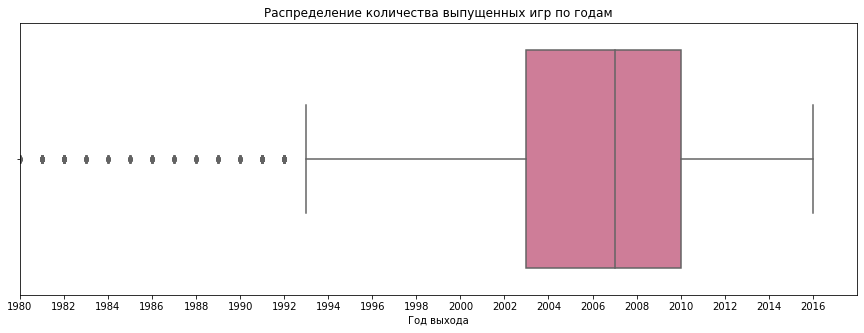

In [31]:
# Визуализируем распределение выпущенных игр по годам (боксплот)
plt.rcParams['figure.figsize'] = (15, 5)
sns.boxplot(x=data['year_of_release'], color='palevioletred')
plt.title('Распределение количества выпущенных игр по годам')
plt.xlabel('Год выхода')
plt.xticks(np.arange(1980, 2018, 2))
_ = plt.xlim(1980, 2018)

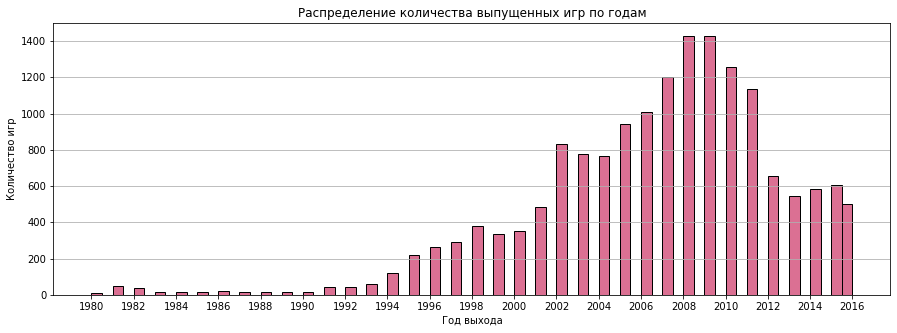

In [32]:
# Визуализируем распределение выпущенных игр по годам (гистограмма)
plt.rcParams['figure.figsize'] = (15, 5)
plt.hist(data['year_of_release'], bins=72, edgecolor='black', color='palevioletred')
plt.title('Распределение количества выпущенных игр по годам')
plt.xlabel('Год выхода')
plt.ylabel('Количество игр')
plt.xticks(np.arange(1980, 2018, 2))
plt.grid(axis='y')
plt.show()

---
- Судя по графикам распределения количества выпущенных игр по годам, видно, что большинство выпущенных игр приходится на период **с 2002 по 2012 годы**
- Пик выпущенных игр приходится на **2008-2009 годы**
- После 2009 года наблюдается снижение кол-ва выпущенных игр
- Также можно сказать о том. что **до 1995 года** игр выпускалось *относительно мало* -> думаю, их учет в данных весомо не повлияет на кол-во проданных копий (и выручку, соответственно) + на прогнозирование продаж на 2017 год

---


###  Как менялись продажи по платформам?

👇🏻 Топ-11 платформ по суммарным продажам: platform
PS2     1246.86
X360     961.83
PS3      931.34
Wii      891.65
DS       802.79
PS       727.58
PS4      314.14
GBA      312.88
PSP      291.18
3DS      257.81
PC       255.76
Name: total_sales, dtype: float64


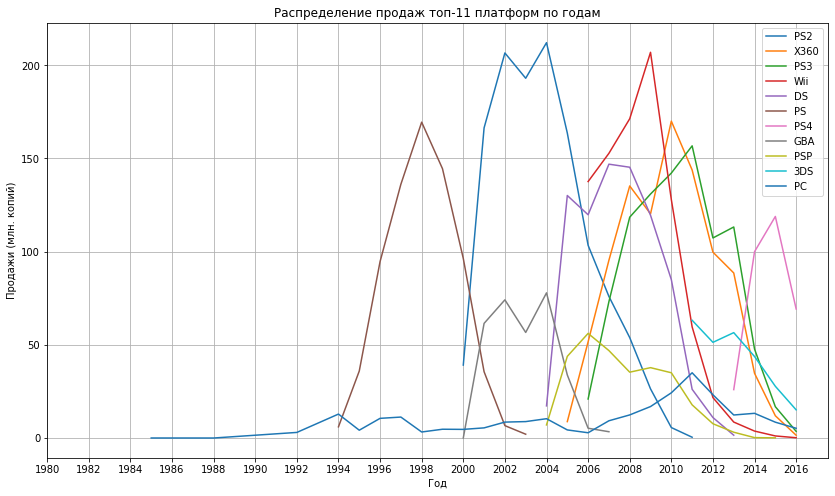

In [33]:
# Топ-10 платформ по суммарным продажам 
top_platforms = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(11)
print(f'👇🏻 Топ-11 платформ по суммарным продажам: {top_platforms}')

# Распределение продаж топ-10 платформ по годам
platform_sales_by_year = data.query('platform in @top_platforms.index').pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
)

# Визуализируем распределение
plt.figure(figsize=(14, 8))
for platform in top_platforms.index:
    plt.plot(platform_sales_by_year[platform], label=platform)

plt.title('Распределение продаж топ-11 платформ по годам')
plt.xlabel('Год')
plt.ylabel('Продажи (млн. копий)')
plt.xticks(np.arange(1980, 2018, 2))
plt.legend()
plt.grid(True)
plt.show()

---
- Большинство платформ имеют **жизненный цикл примерно в 10 лет**: от момента появления до момента, когда продажи становятся минимальными или равными нулю.
- **Пик продаж** на большинстве платформ достигается примерно **через 5 лет** после их появления на рынке.
- Платформа *Wii* была очень популярна в 2009 году, так как привнесла инновационные изменения в гейминг. Однако, как быстро обрела популярность - так же быстро её и потеряла, нехарактерно для большинства платформ
- Игры, выходившие на компьютерах (PC) - всегда имеют низкий уровень продаж относительно других платформ. Однако они стабильно есть. Вероятно, небольшие пики проявляются тогда, когда на ПК выходят популярные эксклюзивы. Нередко тенденция низких продаж связана с пиратскими копиями и отсутствием "эксклюзивов", что стало популярной механикой по повышению продаж у множества уникальных платформ.
- На конец 2016 года платформы PS4 и XOne (хоть её продаж и нет в рейтинге, поскольку платформа совсем свежая) находятся на стадии роста, что делает их потенциально привлекательными для инвестирования в рекламу и продвижение.

---

### Определение актуального периода для прогнозирования

- Поскольку средний жизненный цикл одной платформы - 10 лет, считаю, что актуальным периодом для прогнозирования на следующий год как раз и будет *промежуток в 10 лет* (считая от 2017 года)
- По этому промежутку будет видно, какие платформы уже точно потеряли свою значимость, а какие только находятся в стадии роста и будут вызывать интерес и в следующем году
 
---

In [34]:
# Выбор актуального периода
actual_games = data[data['year_of_release'] >= 2013]

### Какие платформы лидируют по продажам, растут или падают? (в актуальный период)

👇🏻 Топ платформ по суммарным продажам: platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64


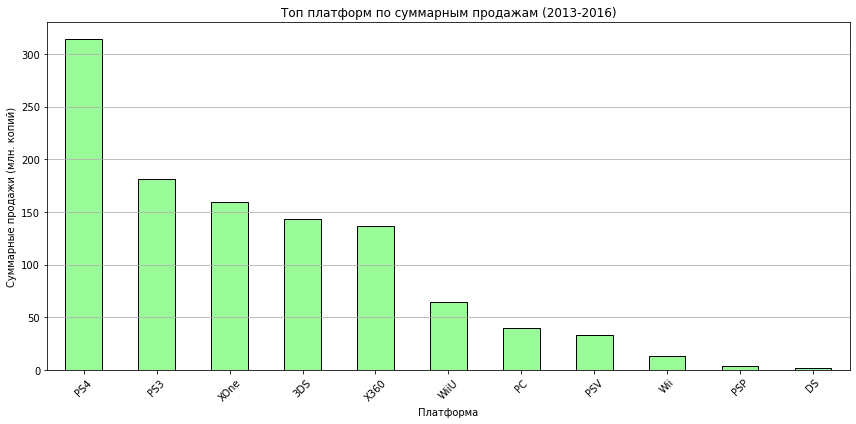

In [35]:
# Сгруппируем платформы за актуальный период
top_actual_platforms = actual_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(f'👇🏻 Топ платформ по суммарным продажам: {top_actual_platforms}')

# Визуализируем наш рейтинг
top_actual_platforms.plot(kind='bar', figsize=(12, 6), edgecolor='black', color='palegreen')
plt.title("Топ платформ по суммарным продажам (2013-2016)")
plt.ylabel("Суммарные продажи (млн. копий)")
plt.xlabel("Платформа")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

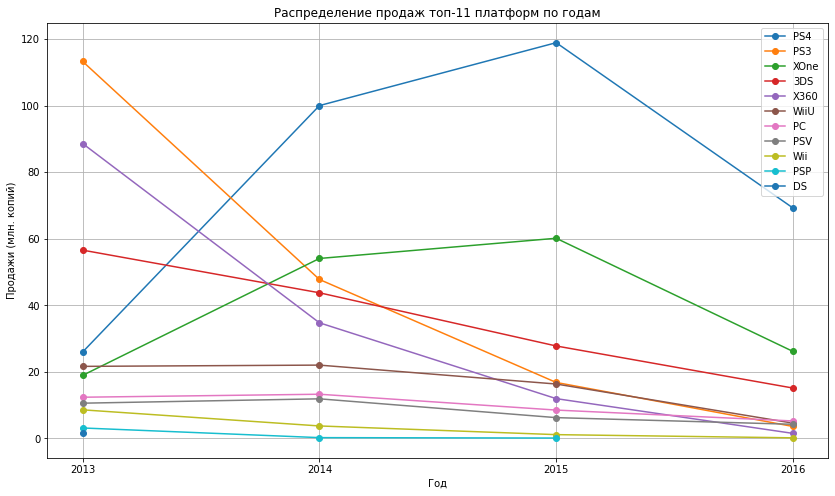

In [36]:
# Распределение продаж платформ по годам
actual_platform_sales_by_year = data.query(
    'platform in @top_actual_platforms.index and year_of_release >= 2013').pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
)

# Визуализируем распределение
plt.figure(figsize=(14, 8))
for platform in top_actual_platforms.index:
    plt.plot(actual_platform_sales_by_year[platform], label=platform, marker='o')

plt.title('Распределение продаж топ-11 платформ по годам')
plt.xlabel('Год')
plt.ylabel('Продажи (млн. копий)')
plt.xticks(np.arange(2013, 2017, 1))
plt.legend()
plt.grid(True)
plt.show()

---

- PS4, PS3 и XOne являются лидерами продаж за актуальный период
- DS, PSV, GBA, 3DS, WiiU, PSP - либо совсем "умерли", как платформы, либо продажи стремительно близятся к 0
- **PS4 и XOne имеют высокий потенциал роста**, учитывая их популярность и относительно недавнее появление на рынке. В частности, PS4 демонстрирует значительное увеличение продаж. Это явно *потенциально прибыльные платформы* 
- 3DS пока еще не так стремительно движется к отсутствию продаж. Вероятно, какой-то интересный эксклюзив сможет вернуть интерес к платформе

---

### График «ящик с усами» по глобальным продажам игр в разбивке по платформам

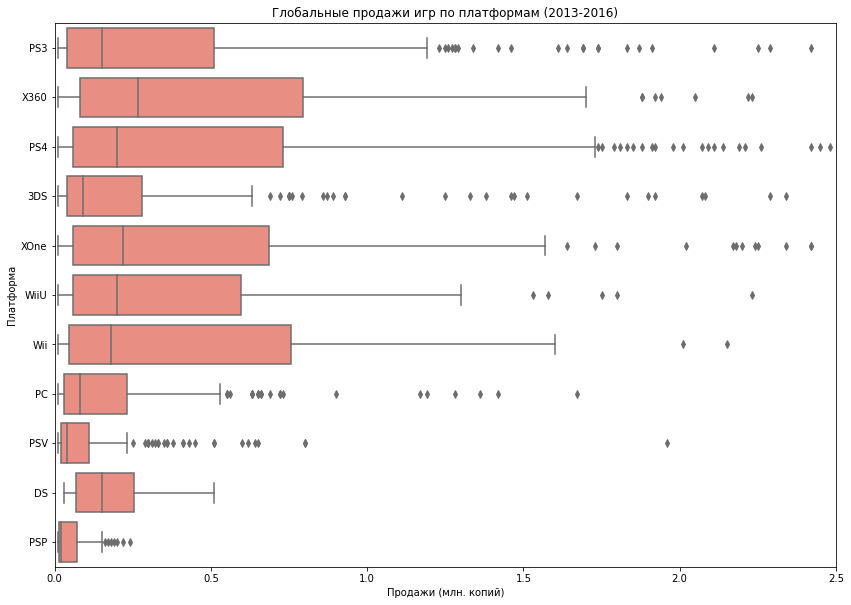

In [37]:
# Строим график "ящик с усами"
plt.figure(figsize=(14, 10))
# actual_games.boxplot(column='total_sales', by='platform', vert=False, patch_artist=True, sym="k.")
sns.boxplot(x=actual_games['total_sales'], y=actual_games['platform'], color='salmon')
plt.title('Глобальные продажи игр по платформам (2013-2016)')
plt.suptitle('')
plt.xlabel('Продажи (млн. копий)')
plt.ylabel('Платформа')
plt.xlim(0, 2.5)
plt.show()

---
- **Медианные продажи** для большинства платформ **весьма скромны** и составляют менее 0,5 млн копий. Это говорит о том, что большинство игр продаются в небольших объемах, в то время как лишь немногие становятся бестселлерами.
- Платформы, такие как *X360, PS4, PS3 и XOne*, имеют **более высокие медианные продажи** по сравнению с другими. Это говорит о большей популярности их игр в среднем.
- У большинства платформ есть выбросы, что, вероятно, указывает на **наличие игр-бестселлеров**, которые продаются гораздо лучше, чем большинство других игр на платформе.

---

###  Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков?

Считаю, что мы можем расценивать платформу *PS4* как **популярную** к моменту 2016 года. Её продажи активно растут, а сама платформа находится в стадии роста своего жизненного цикла

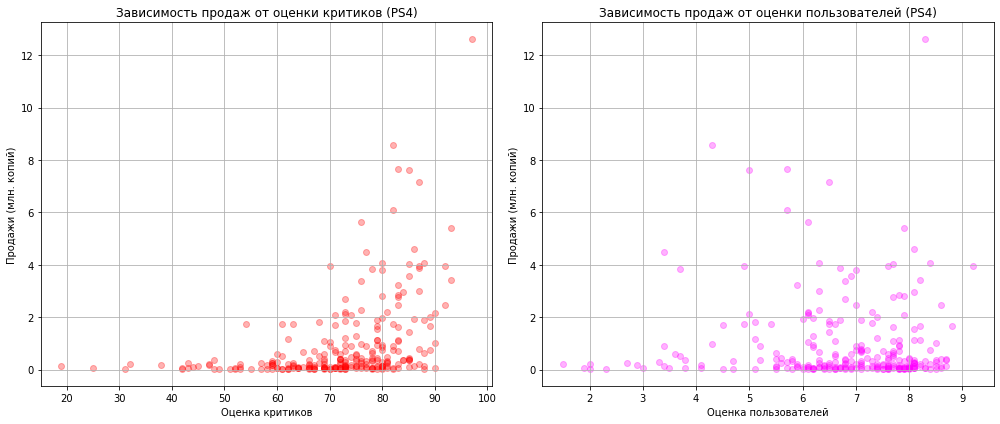

Коэффициент корреляции Пирсона: оценки критиков и продажи -> 0.406567902061781
Коэффициент корреляции Пирсона: оценки пользователей и продажи -> -0.031957110204556376


In [38]:
# Выбираем данные для платформы PS4
ps4_data = actual_games[actual_games['platform'] == 'PS4'].copy()

# Построение диаграмм рассеяния
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Визуализация для корреляции оценок критиков и продаж
ax[0].scatter(ps4_data['critic_score'], ps4_data['total_sales'], alpha=0.3, color='red')
ax[0].set_title('Зависимость продаж от оценки критиков (PS4)')
ax[0].set_xlabel('Оценка критиков')
ax[0].set_ylabel('Продажи (млн. копий)')
ax[0].grid(True)

# Визуализация для корреляции оценок пользователей и продаж
ax[1].scatter(ps4_data['user_score'], ps4_data['total_sales'], alpha=0.3, color='magenta')
ax[1].set_title('Зависимость продаж от оценки пользователей (PS4)')
ax[1].set_xlabel('Оценка пользователей')
ax[1].set_ylabel('Продажи (млн. копий)')
ax[1].grid(True)

plt.tight_layout()
plt.show()

# Расчет корреляции
critic_corr = ps4_data['total_sales'].corr(ps4_data['critic_score'])
user_corr = ps4_data['total_sales'].corr(ps4_data['user_score'])

print(f'Коэффициент корреляции Пирсона: оценки критиков и продажи -> {critic_corr}')
print(f'Коэффициент корреляции Пирсона: оценки пользователей и продажи -> {user_corr}')

---
1. **Оценка критиков:** Значение корреляции составляет приблизительно 0,41, что указывает на *умеренно положительную связь* между оценками критиков и продажами игр на платформе PS4. Это означает, что игры с более высокими оценками критиков, как правило, имеют более высокие продажи.


2. **Оценка пользователей:** Значение корреляции составляет приблизительно -0,03, что говорит о *слабой отрицательной связи* между оценками пользователей и продажами. Такая слабая корреляция практически эквивалентна отсутствию связи. Можно сказать, что оценки пользователей критически не влияют на продажи

---

### Зависимость продаж от оценок пользователей и критиков на других платформах

In [39]:
# Расчет корреляции продаж для платформ
correlations = {}

for platform in top_actual_platforms.index:
    platform_data = actual_games[actual_games['platform'] == platform]
    critic_corr = platform_data['total_sales'].corr(platform_data['critic_score'])
    user_corr = platform_data['total_sales'].corr(platform_data['user_score'])
    correlations[platform] = {'critic_corr': critic_corr, 'user_corr': user_corr}

correlation_data = pd.DataFrame(correlations).T

correlation_data

/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,critic_corr,user_corr
PS4,0.406568,-0.031957
PS3,0.334285,0.002394
XOne,0.416998,-0.068925
3DS,0.357057,0.241504
X360,0.350345,-0.011742
WiiU,0.376415,0.419330
PC,0.196030,-0.093842
PSV,0.254742,0.000942
Wii,NaN,0.682942
PSP,NaN,-1.000000


---
1. **Оценка критиков:** Для большинства платформ наблюдается *положительная корреляция* между оценками критиков и продажами, что говорит о том, что игры с более высокими оценками критиков, как правило, имеют более высокие продажи. Это особенно верно для платформ *PS3, X360, PS4 и XOne*.
2. **Оценка пользователей:** Здесь ситуация *менее однозначная*. Некоторые платформы, такие как *WiiU, Wii и 3DS*, имеют положительную корреляцию, что говорит о том, что высоко оцененные пользователями игры продаются лучше. Однако другие платформы, такие как PS4 и XOne, имеют слабую отрицательную корреляцию.

В целом, такие зависимости могу объясняться тем, что оценки критиков обычно доступны **до релиза игры** и могут повлиять на решение о покупке, в то время как оценки пользователей часто основываются на реальном опыте игры и могут быть более разнообразными и субъективными.

---

### Общее распределение игр по жанрам

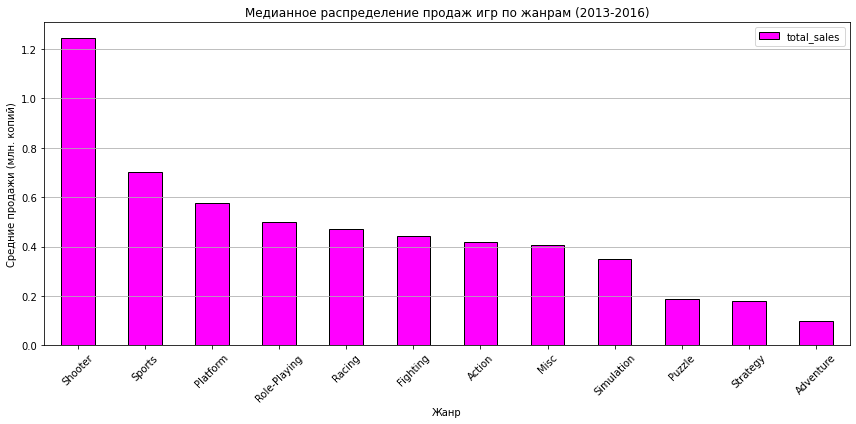

In [40]:
# genre_sales = actual_games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Создадим сводную таблицу для средних продаж по жанрам
genre_sales = actual_games.pivot_table(
    index='genre',
    values='total_sales',
    aggfunc='mean') \
    .sort_values(by='total_sales', ascending=False)

genre_sales.plot(kind='bar', figsize=(12, 6), edgecolor='black', color='magenta')
plt.title("Медианное распределение продаж игр по жанрам (2013-2016)")
plt.ylabel("Средние продажи (млн. копий)")
plt.xlabel("Жанр")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

---
- **Shooter** является *наиболее прибыльным жанром*, принося значительные продажи.
- Жанры **Sports, Platform и Role-Playing** также показывают *хорошие продажи*, но уже в несколько раз меньшие, чем "Shooter"
- Жанры **Puzzle, Strategy и Adventure** *менее популярны* и приносят минимальные продажи по сравнению с другими.

---

### Вывод по исследовательскому анализу данных

---

- Большинство выпущенных игр приходится на период **с 2002 по 2012 годы**
- Пик выпущенных игр приходится на **2008-2009 годы**
- После 2009 года наблюдается *снижение кол-ва выпущенных игр*
- Большинство платформ имеют **жизненный цикл примерно в 10 лет**: от момента появления до момента, когда продажи становятся минимальными или равными нулю.
- **Пик продаж** на большинстве платформ достигается примерно **через 5 лет** после их появления на рынке.
- Актуальный период для исследования и прогнозирования - **2013-2016 год**. По этому промежутку будет видно, какие платформы находятся в стадии зрелости, а какие только находятся в стадии роста и будут вызывать интерес и в следующем году.
- **PS4 и XOne имеют высокий потенциал роста**, учитывая их популярность и относительно недавнее появление на рынке. В частности, PS4 демонстрирует значительное увеличение продаж. Это явно *потенциально прибыльные платформы* 
- **Медианные продажи** для большинства платформ **весьма скромны** и составляют менее 0,2 млн копий. Это говорит о том, что большинство игр продаются в небольших объемах, в то время как лишь немногие становятся бестселлерами.
- Платформы, такие как *X360, PS4, PS3 и XOne*, имеют **более высокие медианные продажи** по сравнению с другими. Это говорит о большей популярности их игр в среднем.
- **Оценка критиков:** Для большинства платформ наблюдается *положительная корреляция* между оценками критиков и продажами, что говорит о том, что игры с более высокими оценками критиков, как правило, имеют более высокие продажи. Это особенно верно для платформ *PS3, X360, PS4 и XOne*.
- **Оценка пользователей:** Здесь ситуация *менее однозначная*. Некоторые платформы, такие как *WiiU, Wii и 3DS*, имеют положительную корреляцию, что говорит о том, что высоко оцененные пользователями игры продаются лучше. Однако другие платформы, такие как PS4 и XOne, имеют слабую отрицательную корреляцию.
- В целом, такие зависимости могу объясняться тем, что оценки критиков обычно доступны **до релиза игры** и могут повлиять на решение о покупке, в то время как оценки пользователей часто основываются на реальном опыте игры и могут быть более разнообразными и субъективными.




---

##  Портрет пользователя каждого региона

### Создание функций для изучения портрета пользователя

---
**Предлагаю написать 2 функции, которые позволят автоматизировать получение информации о регионах**
- В одной мы получаем основные статистики и данные
- С помощью второй -> строим графики, на которых наглядно можно заметить ключевые корреляции и рейтинги 

---

In [41]:
def top_n_items(df, group_field, method='count', sum_field='none', n_items=5):
    """
    Функция возвращает top-N значений столбца датафрейма df, сгруппированных по полю group_field.
    
    ----------
    PARAMETERS
    ----------
    df: Pandas Dataframe
        Набор данных.
    group_field: string
        Поле, по которому будет сделана группировка данных.
    method: string
        count - значение по умолчанию, sum - второе возможное значение.
    sum_field: int
        Название поля, по которому будет посчитана сумма при группировке.
    n_items: string
        5 - значение по умолчанию. Количество возвращаемых значений.
    -------
    RETURNS
    -------
    top_N_items: List
        Cписок top-N значений поля group_field, полученного в результате применения метода method
        по полю sum_field к набору данных df
    df_grouped: Pandas Dataframe
        Датафрейм с top-N значений поля group_field и статистика после применения метода method
    """

    # Определяем top-N позиций
    if method == 'count':
        df_grouped = df.groupby(group_field)['name'].count().reset_index()
    elif method == 'sum' and sum_field != 'none':
        df_grouped = df.groupby(group_field)[sum_field].sum().reset_index()
    else:
        return

    df_grouped.columns = [group_field, method]
    df_grouped.sort_values(by=method, ascending=False, inplace=True)
    top_N_items = df_grouped[group_field].head(n_items).to_list()

    return top_N_items, df_grouped.head(n_items)


def plot_region(df, sum_field, method='sum', n_items=5):
    """
    Функция выводит на экран набор графиков для проведения анализа портрета пользователя:
    - top-N платформ по продажам
    - top-N жанров по продажам
    - продажи по рейтингу
    - продажи top-N платформ по годам
    - диаграмма рассеяния critic_score - <region>_sales
    - диаграмма рассеяния user_score - <region>_sales
    
    ----------
    PARAMETERS
    ----------
    df: Pandas Dataframe
        Набор данных.
    sum_field: string
        Поле, по которому будет сделана группировка данных.
    method: string
        count - значение по умолчанию, sum - второе возможное значение.
    n_items: string
        5 - значение по умолчанию. Количество возвращаемых значений.
    
    ----------
    RETURNS
    ----------
        Функция возвращает None. Выводятся определенные параметрами графики.
    """

    # Получаем список и датафрейм top-N значений по платформе и жанру
    top_5_platforms, df_top_5_platforms = top_n_items(df, 'platform', method=method
                                                      , sum_field=sum_field, n_items=n_items)
    top_5_genres, df_top_5_genres = top_n_items(df, 'genre', method=method
                                                , sum_field=sum_field, n_items=n_items)

    # Задаем 6 графиков
    fig, ax = plt.subplots(3, 2, figsize=(24, 12))
    fig.subplots_adjust(hspace=1)

    # top-N платформ по продажам
    ax[0][0].set_xlabel('Платформа', fontsize=14)
    ax[0][0].set_ylabel('Продажи', fontsize=14)
    ax[0][0].set_title('Рейтинг продаж Top-' + str(n_items) + ' платформ', fontsize=16)
    ax[0][0].grid(axis='y')
    ax[0][0].bar(df_top_5_platforms['platform'], df_top_5_platforms[method], edgecolor='black', color='magenta')

    # top-N жанров по продажам
    ax[0][1].set_xlabel('Жанр', fontsize=14)
    ax[0][1].set_ylabel('Продажи', fontsize=14)
    ax[0][1].set_title('Рейтинг продаж Top-' + str(n_items) + ' жанров', fontsize=16)
    ax[0][1].grid(axis='y')
    ax[0][1].bar(df_top_5_genres['genre'], df_top_5_genres[method], edgecolor='black', color='salmon')

    # Продажи по рейтингу
    df_rating = df.groupby('rating')[sum_field].sum().reset_index()
    df_rating.columns = ['rating', method]

    ax[1][0].set_xlabel('Рейтинг', fontsize=14)
    ax[1][0].set_ylabel('Продажи', fontsize=14)
    ax[1][0].set_title('Продажи по рейтингу', fontsize=16)
    ax[1][0].grid(axis='y')
    ax[1][0].bar(df_rating['rating'], df_rating[method], edgecolor='black', color='palegreen')

    # Продажи top-N платформ по годам
    df_sales_by_year = df.pivot_table(
        index='year_of_release',
        columns='platform',
        values=sum_field,
        aggfunc='sum')

    ax[1][1].set_xlabel('Год', fontsize=14)
    ax[1][1].set_ylabel('Продажи', fontsize=14)
    ax[1][1].set_title('Продажи по платформам по годам', fontsize=16)
    ax[1][1].set_xticks(np.arange(2013, 2017, 1))
    for platform in df_top_5_platforms['platform']:
        ax[1][1].plot(df_sales_by_year[platform], label=platform, marker='o')
        ax[1][1].legend()

    # Диаграмма рассеяния critic_score - <region>_sales
    ax[2][0].scatter(df['critic_score'], df[sum_field], alpha=0.3, color='red')
    ax[2][0].set_title('Зависимость продаж от оценки критиков')
    ax[2][0].set_xlabel('Оценка критиков')
    ax[2][0].set_ylabel('Продажи')
    ax[2][0].grid(True)

    # Диаграмма рассеяния user_score - <region>_sales
    ax[2][1].scatter(df['user_score'], df[sum_field], alpha=0.3, color='blue')
    ax[2][1].set_title('Зависимость продаж от оценки пользователей')
    ax[2][1].set_xlabel('Оценка пользователей')
    ax[2][1].set_ylabel('Продажи')
    ax[2][1].grid(True)

    plt.show();

    region_critic_corr = df[sum_field].corr(df['critic_score'])
    region_user_corr = df[sum_field].corr(df['user_score'])
    print(f'Корреляция оценок критиков и продаж в регионе: {region_critic_corr}')
    print(f'Корреляция оценок пользователей и продаж в регионе: {region_user_corr}')

### Регион NA

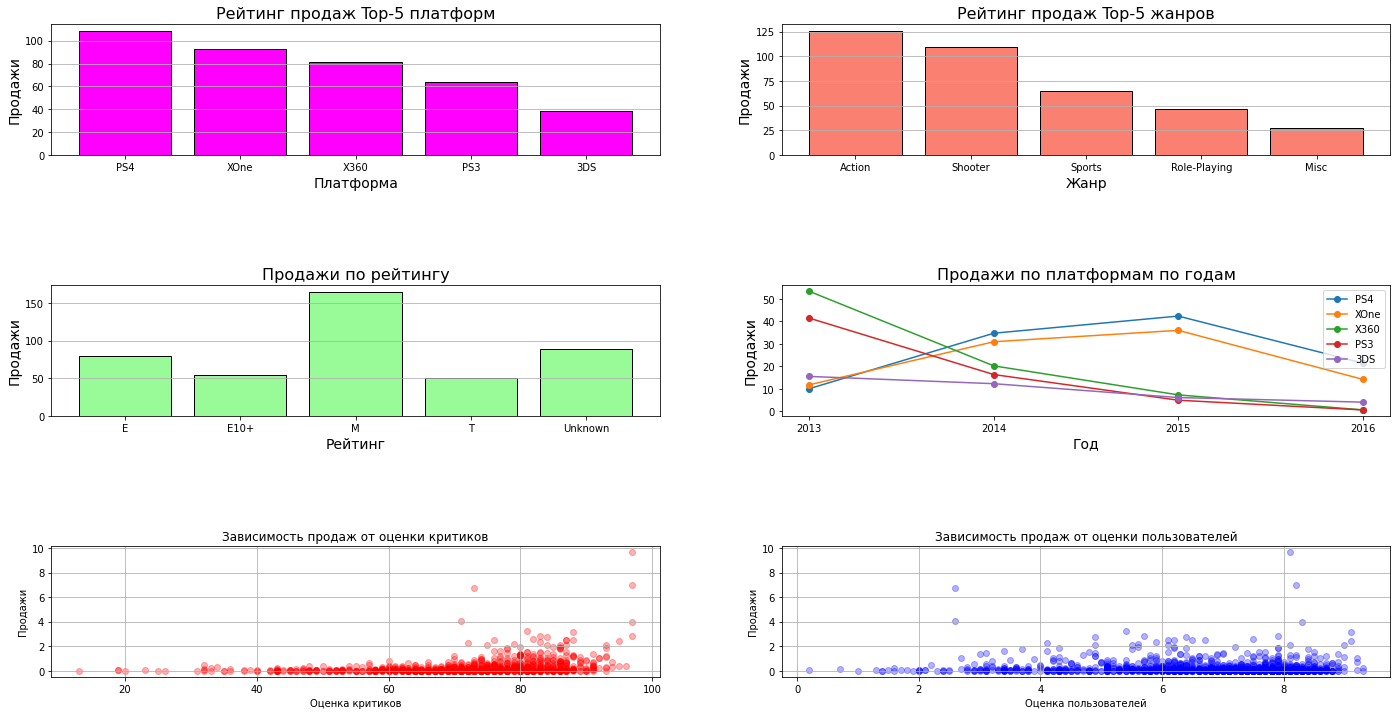

Корреляция оценок критиков и продаж в регионе: 0.3011299443114695
Корреляция оценок пользователей и продаж в регионе: -0.020010136415148035


In [42]:
plot_region(actual_games, 'na_sales', method='sum', n_items=5)

---
**1. Самые популярные платформы региона NA (топ-5):**
- PS4
- XOne
- X360
- PS3
- 3DS


Больше всего продаж было сделано на платформу PS4. PS4 все же не настолько устоялась на рынке + находится в стадии роста, из-за чего она вызывает к себе особый интерес со стороны потребителей.

**2. Самые популярные жанры региона NA (топ-5):**
- Action
- Shooter
- Sports
- Role-playing
- Misc


Как было выяснено раннее, жанры *Action* и *Shooter* в принципе являлись самыми популярными на всех платформах за период исследования, поэтому неудивительно, что в одном из самых населенных регионов продажи по этим жанрам высоки в рейтинге. Остальные же жанры, в порядке убывания, также соответствуют общему рейтингу. Можно предположить, что в Северной Америке в указанный промежуток времени ситуация в стране была накаленной (относительно расовой борьбы и других противоправных движений). В связи с этим, топ-жанры из списка были продаваемы, так как геймеры видели в них проявление и отражение настоящей действительности. 

**3. Влияет ли рейтинг ESRB на продажи в регионе NA?**

Больше всего проданных копий игр было с рейтингом `"M"` *('mature', возраст 17+)*. Игры с цензом повыше - это, вероятно, популярные выпущенные релизы жанра "Shooter" и "Action", в которыз транслировалось насилие / жестокость. Сами по себе игры тоже популярны, но круг потребителей заметно выше, чем у игр ценза *7+*. В целом, можно сделать вывод о том, что рейтинг ESRB влияет на продажи в регионе, а демографически в регионе любят "взрослые" игры. 


Отдельно отмечу, что наблюдается *умеренно положительная корреляция* между оценками критиков и продажами. Вероятно, в регионе NA довольно трепетно относятся к оценкам критиков, что влияет на покупку конечного продукта. Это утверждение несправедливо для оценок пользователей, так как зависимость, практически, отсутствует. Подобное положение может говорить о высоком уровне индивидуализма и "свободе мысли" у пользователей относительно игровой тематики.

---

### Регион EU

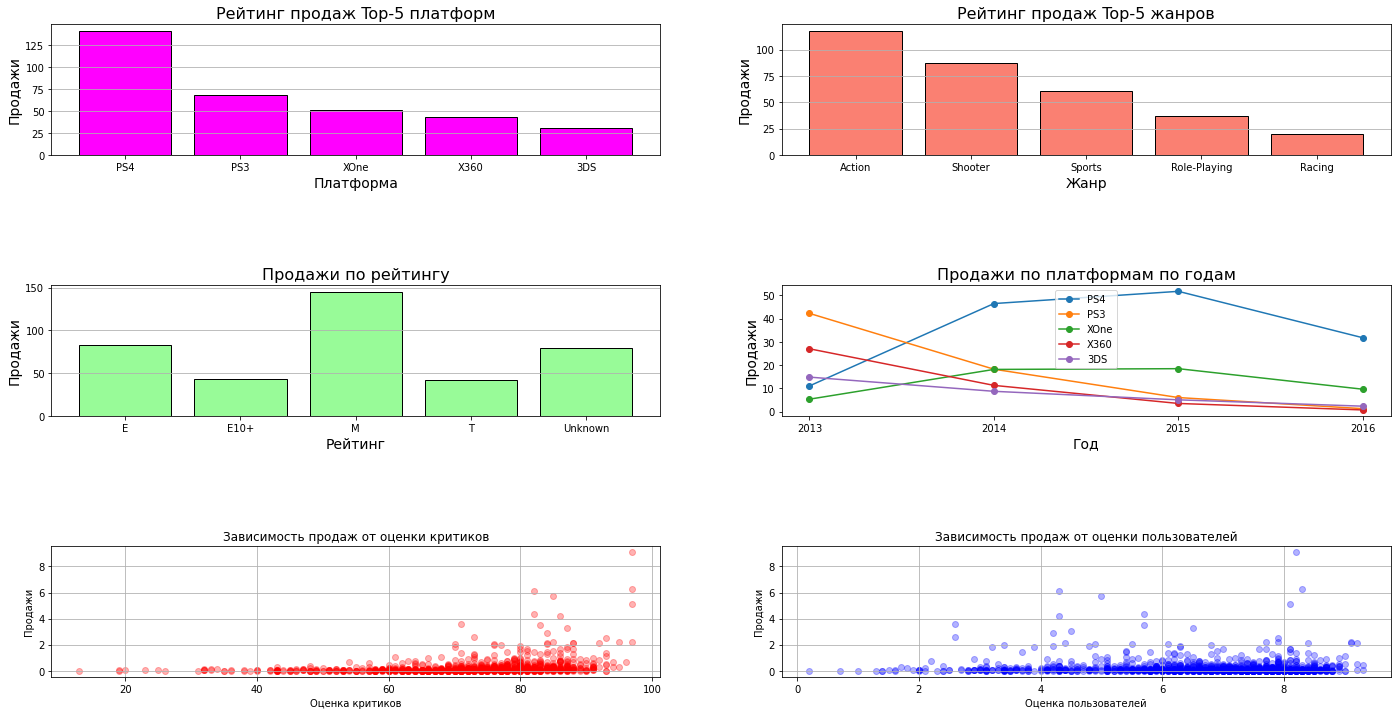

Корреляция оценок критиков и продаж в регионе: 0.28078507833299765
Корреляция оценок пользователей и продаж в регионе: -0.02703977307445156


In [43]:
plot_region(actual_games, 'eu_sales', method='sum', n_items=5)

---
**1. Самые популярные платформы региона EU (топ-5):**
- PS4
- PS3
- XOne
- X360
- 3DS

Больше всего продаж было сделано снова на платформу PS4. Какой-то очевидной причины этому явлению - нет. Вероятно, Европейские геймеры просто *следовали тенденции* и покупали популярную мировую платформу с новыми бестселлерами. Рейтинг очень похож в целом на регион NA, однако совокупно продаж больше (думаю, связано с численностью населения и популярностью гейминга в регионе так такового). 

**2. Самые популярные жанры региона EU(топ-5):**
- Action
- Shooter
- Sports
- Role-playing
- Racing


Как было выяснено раннее, жанры *Action* и *Shooter* в принципе являлись самыми популярными на всех платформах за период исследования, поэтому и в данном регионе продажи по жанрам - высокие. Добавился новый жанр - "Racing". 

**3. Влияет ли рейтинг ESRB на продажи в регионе EU?**

Проданные копии с рейтингом `"M"` *('mature', возраст 17+)* представляют большинство. Можно сказать, что в регионе популярны игры для геймеров постарше. В остальном, популярны и игры с рейтингом `"E"` *('everyone', возраст 7+)*


Отдельно отмечу, что снова наблюдается *умеренно положительная корреляция* между оценками критиков и продажами. Вероятно, в регионе EU тоже трепетно относятся к оценкам критиков, что влияет на покупку конечного продукта. Это утверждение несправедливо для оценок пользователей, так как зависимость, практически, отсутствует. 

---

### Регион JP

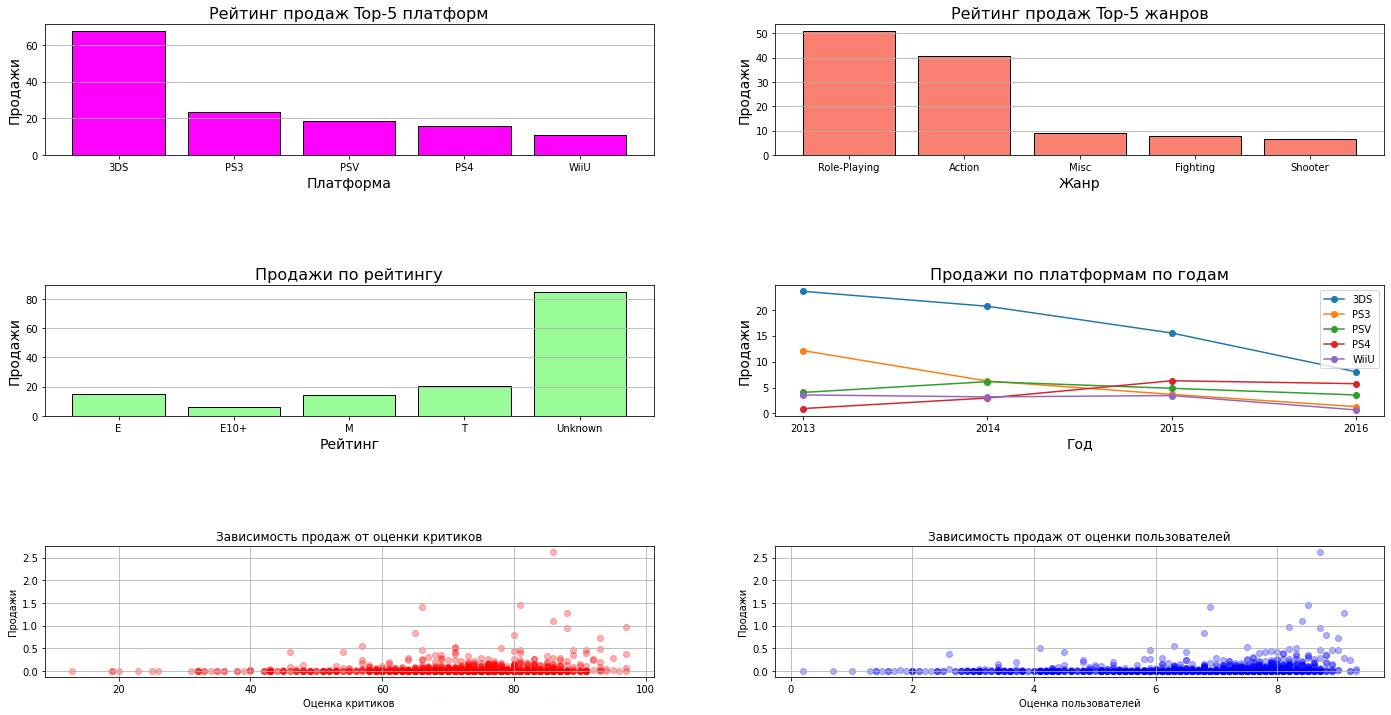

Корреляция оценок критиков и продаж в регионе: 0.13414298238839256
Корреляция оценок пользователей и продаж в регионе: 0.1940250994164801


In [44]:
plot_region(actual_games, 'jp_sales', method='sum', n_items=5)

---
**1. Самые популярные платформы региона JP (топ-5):**
- 3DS
- PS3
- PSV
- PS4
- WiiU

Больше всего продаж было сделано на платформы 3DS и PS3. Данные по региону значительно отличаются от других: геймеры из Японии предпочитают пользоваться продуктами собственного культурного производства, что явно выделяет их на фоне остальных геймеров как *ценителей своей культуры*. Почти все платформы в рейтинге продаж - Японского производства, что подтверждает указанный статистический факт. 

**2. Самые популярные жанры региона JP (топ-5):**
- Role-playing
- Action
- Misc
- Fighting
- Shooter


Опять же, наблюдается весомая разница относительно других регионов.Геймеры из региона `JP` почти в 2 раза охотнее покупают игры жанра "Role-playing". Тоже похоже на культурную традицию, ведь японской культуре присущи образы и ролевые оттенки. Популярного жанра "Shooter" и вовсе нет в списке: игроки из восточного региона более миролюбивы и предпочитают спокойный, интересный геймплей с интересным сюжетом.


**3. Влияет ли рейтинг ESRB на продажи в регионе JP?**

Более всего проданных копий на рейтинг `"Unknown"`. Видимо, выбор геймеров из этого региона настолько уникален, что для подобных игр либо нет рейтинга, либо он не определен единым образом.  Следующие по популярности рейтинги - `"E"` *('everyone', возраст 7+)* и `"T"` *('teens', возраст 12-16+)*. В целом, рейтинг ESRB **не так значительно** влияет на продажи в данном регионе относительно других. 


Отдельно отмечу, что корреляции оценок критиков / оценок пользователей и продаж почти равны. Это может означать, что пользователи из региона JP уделяют внимание как оценкам профессионалов, так и оценкам обычных пользователей, учитывая мнение обеих групп при покупке продукта.

---

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

**H0:** Средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC.

**H1:** Средний пользовательский рейтинг платформы Xbox One не равен среднему пользовательскому рейтингу платформы PC.

- Для проверки гипотезы будем использовать *двухсторонний t-test для двух независимых выборок*, так как выборки не зависят друг от друга и нужно проверить утверждение на равенство (а не разницу *больше* или *меньше*)
- Значение *aplha* установим классическое - 0.05

In [45]:
# Выборка для Xbox One
xbox_one_scores = actual_games.query('platform == "XOne" and user_score.notna()')['user_score']

# Выборка для PC
pc_scores = actual_games.query('platform == "PC" and user_score.notna()')['user_score']

# Уровень значимости
alpha = 0.05

# Проведение t-теста
results = st.ttest_ind(xbox_one_scores, pc_scores)

# Вывод результатов
print(f'p-значение: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о том, что средние пользовательские рейтинги Xbox One и PC равны')
else:
    print('Не удалось отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги Xbox One и PC равны')

p-значение: 0.14012658403611647
Не удалось отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги Xbox One и PC равны


---
**Вывод по проверке гипотезы №1:**

- *Нет достаточных оснований для отклонения нулевой гипотезы*. 
- Можно сказать, что средние пользовательские рейтинги платформ Xbox One и PC, вероятно, *одинаковы*.

---

###  Средние пользовательские рейтинги жанров `Action`  и `Sports` разные.

**H0:** Средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports.

**H1:** Средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports.

- Для проверки гипотезы будем использовать *двухсторонний t-test для двух независимых выборок*, так как выборки не зависят друг от друга и нужно проверить утверждение на равенство (а не разницу *больше* или *меньше*)
- Значение *aplha* установим классическое - 0.05

In [46]:
# Выборка для жанра Action
action_scores = actual_games.query('genre == "Action" and user_score.notna()')['user_score']

# Выборка для жанра Sports
sports_scores = actual_games.query('genre == "Sports" and user_score.notna()')['user_score']

# Уровень значимости
alpha = 0.05

# Проведение t-теста
results = st.ttest_ind(action_scores, sports_scores)

# Вывод результатов
print(f'p-значение: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports равны')
else:
    print(
        'Не удалось отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports равны')

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports равны


---
**Вывод по проверке гипотезы №2:**

- *Есть достаточно оснований для отклонения нулевой гипотезы*. 
- Можно сказать, что средние пользовательские рейтинги жанров `Action` и `Sports`, вероятно, *разные*.

---

## Общий вывод

Был проведен анализ исторических данных, содержавших информацию о продажах игр, оценках пользователей и экспертов, жанрах и игровых платформах. Были выявлены определяющие успешность игры закономерности для того, чтобы сделать ставку на потенциально популярный продукт и спланировать будущие рекламные кампании интернет-магазина по продаже компьютерных игр "Стримчик". 

В общем и целом, можно заключить, что **самой потенциально успешной платформой в 2017 году может быть PS4**, так как она находится в стадии роста жизненного цикла (практически в самом начале) и как раз набирает пик популярности, затмевая другие платформы. Наравне с ней, можно выделить потенциальную платформу **Xbox One** со схожими предпоссылками на успех. Вероятно, какой-либо уникальный релиз для платформы **PC** тоже может стать успешным и породить "пик продаж", потому что платформа остается стабильно продаваемой на протяжении длительного периода времени. 

*Определяющие успешность игры закономерности:*
- Выбор популярной платформы *(PS4, Xbox One, PC)*
- Выбор популярного жанра *(Action, Shooter, Sports)*
- Внимание к критериям оценки критиков, так как они имеют небольшое влияние на спрос потребителей
- Внимание к культуре региона (и к портрету пользователя этого региона), в котором будет распространяться игра. Например, игра точно будет успешна в регионе JP, если её жанр -> Role-playing, а платформа -> портативная и JP-производства.


---

Исследование было разделено на несколько этапов:

**1. Этап загрузки данных**
- Всего получили данные о *~11 560* выпущенных играх
- В данных представлена информация об играх, выпущенных на *31 платформе*
- Всего представлено *13 игровых жанров* 
- Заметили, что есть как пропущенные значения, так и непонятные, требующие изучения

**2. Предобработка данных**
- Привели **названия столбцов к нижнему регистру**, к единому виду
- Убрали пропущенные значения (2 строки) из столбцов `[name]` и `[genre]`
- Добавили год выпуска к **17 играм** в столбце `[year_of_release]` при помощи созданной функции. В этом же столбце **удалили 1.53%** (от общего числа записей) данных с пропущенными значениями. 
- Определили, что **51% игр** не оценены критиками. **Оставили** пропущенные значения в `[critic_score]`, так как они занимали более половины датасета
- В столбце `[user_score]` убрали пометку *tbd* и заменили ячейки с её наличием на пустые значения `NaN`. Пропуски составили **54.6%** от общего числа записей, в связи с чем **оставили** пропущенные значения 
- В столбце `[rating]` заменили пропуски на значение `Unknown`, так как рейтинг игр с пропусками действительно неизвестен.
- Дубликаты в данных *не были обнаружены*
- Преобразовали тип данных в столбце `[year_of_release]` на `int`. Столбец `[user_score]` привели к типу данных *`float`*
- Посчитали **суммарные продажи** во всех регионах и добавили эти значения в новый столбец датафрейма. 


**3. Исследовательский анализ данных**

Данный этап был разделен на несколько мини-исследований, которые дополнительно визуализировались графиками и диаграммами. Вот, что удалось выяснить:

- Большинство выпущенных игр приходится на период **с 2002 по 2012 годы**
- Пик выпущенных игр приходится на **2008-2009 годы**
- Большинство платформ имеют **жизненный цикл примерно в 10 лет**: от момента появления до момента, когда продажи становятся минимальными или равными нулю.
- **Пик продаж** на большинстве платформ достигается примерно **через 5 лет** после их появления на рынке.
- Определили актуальный период для исследования и прогнозирования - **2013-2016 год**. По этому промежутку будет видно, какие платформы находятся в стадии зрелости, а какие только входят в стадию роста и будут вызывать интерес и в следующем году.
- Определили, что **PS4 и XOne имеют высокий потенциал роста**, учитывая их популярность и относительно недавнее появление на рынке. В частности, PS4 демонстрирует значительное увеличение продаж. Это явно *потенциально прибыльные платформы* 
- **Медианные продажи** для большинства платформ **весьма скромны** и составляют менее 0,2 млн копий. Это говорит о том, что большинство игр продаются в небольших объемах, в то время как лишь немногие становятся бестселлерами.
- **Оценка критиков:** Для большинства платформ наблюдается *положительная корреляция* между оценками критиков и продажами, что говорит о том, что игры с более высокими оценками критиков, как правило, имеют более высокие продажи. Это особенно верно для платформ *PS3, X360, PS4 и XOne*.
- **Оценка пользователей:** Здесь ситуация *менее однозначная*. Некоторые платформы, такие как *WiiU и 3DS*, имеют положительную корреляцию, что говорит о том, что высоко оцененные пользователями игры продаются лучше. Однако другие платформы, такие как PS4 и XOne, имеют слабую отрицательную корреляцию.
- В целом, такие зависимости могут объясняться тем, что оценки критиков обычно доступны **до релиза игры** и могут повлиять на решение о покупке, в то время как оценки пользователей часто основываются на реальном опыте игры и могут быть более разнообразными и субъективными.

**4. Портрет пользователя каждого региона**
- Создали две вспомогательные функции `top_n_items` и `plot_region`, при помощи которых удобно определили портреты пользователей по каждому региону:
    - `РЕГИОН NA` -> Предпочитает популярные платформы в пике продаж. Из жанров симпатизируют "Action" и "Shooter". Популярные рейтинги ESRB: 'E' и 'M' (игры для всех и игры 17+ с актами насилия и жестокости). Оценки критиков имеют положительное влияние на спрос потребителя. 
    - `РЕГИОН EU`-> Тоже предпочитает игры, выходящие на популярных платформах. Любимые жанры: "Action" и "Shooter". ESRB рейтинг не оказывает особого влияния на продажи, однако более всего проданных копий было с рейтингом 'M'. К оценкам критиков пользователь также прислушивается, что явно может влиять на его покупательскую способность. 
    - `РЕГИОН JP`-> Выделяющийся пользователь на фоне других регионов. Любит те платформы, которые выпускаются именно в его регионе, принадлежат его культуре. Интересующие жанры: "Role-Playing" и "Action". Рейтинг ESRB, практически, не имеет влияния на продажи: большинство проданных копий игр либо не имеют рейтинг, либо он не установлен. Пользователь умеренно положительно прислушивается как к оценкам критиков, так и к оценкам пользователей.  

**5. Проверка гипотез**

Проверили несколько гипотез бизнеса, из которых можно сделать следующие *вероятные* выводы:

- Можно сказать, что средние пользовательские рейтинги платформ Xbox One и PC *одинаковы*.
- Можно утвердить, что средние пользовательские рейтинги жанров `Action` и `Sports` *разные*.


---



